# 1. Multi-input models

The functional API can be used to build models that have multiple inputs. Typically, such models will at some point "merge" their different input branches using a layer that can combine several tensors, i.e. by adding them, concatenating them, etc. This is usually done via a Keras "merge operation" such <i>as keras.layers.add</i>, <i>keras.layers.concatenate</i>, etc. Let’s take a look at a very simple example of a multi-input model: a question-answering model.

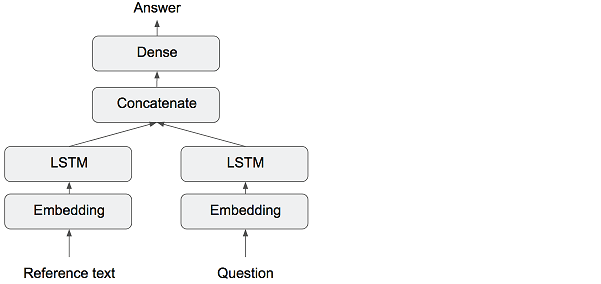

In [21]:
#Functional API implementation of a two-input question-answering model
from keras.models import Model
from keras import layers
from keras import Input

text_vocabulary_size = 1000
question_vocabulary_size = 1000
answer_vocabulary_size = 500

# Our text input is a variable-length sequence of integers.
# Note that we can optionally name our inputs!
text_input = Input(shape=(None,), dtype='int32', name='text')

# Which we embed into a sequence of vectors of size 64
embedded_text = layers.Embedding(text_vocabulary_size,64)(text_input)

# Which we encoded in a single vector via a LSTM
encoded_text = layers.LSTM(32)(embedded_text)

# Same process (with different layer instances) for the question
question_input = Input(shape=(None,), dtype='int32', name='question')
embedded_question = layers.Embedding(question_vocabulary_size,32)(question_input)
encoded_question = layers.LSTM(16)(embedded_question)

# We then concatenate the encoded question and encoded text
concatenated = layers.concatenate([encoded_text, encoded_question], axis=-1)

# And we add a softmax classifier on top
answer = layers.Dense(answer_vocabulary_size, activation='softmax')(concatenated)

# At model instantiation, we specify the two inputs and the output:
model = Model([text_input, question_input], answer)
model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['acc'])

In [24]:
#Feeding data to a multi-input model
import numpy as np

num_samples = 10000
max_length = 1000

# Let's generate some dummy Numpy data
text = np.random.randint(1, text_vocabulary_size, size=(num_samples, max_length))
question = np.random.randint(1, question_vocabulary_size, size=(num_samples, max_length))

# Answers are one-hot encoded, not integers
answers = np.random.randint(0, 2, size=(num_samples, answer_vocabulary_size))

# Fitting using a list of inputs
# model.fit([text, question], answers, epochs=10, batch_size=128,validation_split=0.2)

# # Fitting using a dictionary of inputs (only if inputs were named!)
# model.fit({'text': text, 'question': question}, answers,
#             epochs=10, batch_size=128)

In [25]:
# Fitting using a list of inputs
model.fit([text, question], answers, epochs=10, batch_size=128,validation_split=0.2)

Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 140s 18ms/step - loss: 1553.5192 - acc: 0.0119 - val_loss: 1552.5407 - val_acc: 0.0000e+00
Epoch 2/10
8000/8000 [==============================] - 135s 17ms/step - loss: 1553.4580 - acc: 0.0047 - val_loss: 1552.5491 - val_acc: 0.0015
Epoch 3/10
8000/8000 [==============================] - 137s 17ms/step - loss: 1553.3627 - acc: 0.0046 - val_loss: 1552.5796 - val_acc: 0.0035
Epoch 4/10
8000/8000 [==============================] - 134s 17ms/step - loss: 1553.2089 - acc: 0.0097 - val_loss: 1552.6563 - val_acc: 0.0045
Epoch 5/10
8000/8000 [==============================] - 139s 17ms/step - loss: 1553.0371 - acc: 0.0069 - val_loss: 1552.7615 - val_acc: 0.0030
Epoch 6/10
8000/8000 [==============================] - 138s 17ms/step - loss: 1552.8717 - acc: 0.0054 - val_loss: 1552.8764 - val_acc: 0.0025
Epoch 7/10
8000/8000 [==============================] - 130s 16ms/step - loss: 1552.7171 -

# 2. Multi-output models

The functional API can be used to build models that have multiple inputs. Typically, such
models will at some point "merge" their different input branches using a layer that can
combine several tensors, i.e. by adding them, concatenating them, etc. This is usually
done via a Keras "merge operation" such as keras.layers.add,
keras.layers.concatenate, etc. Let’s take a look at a very simple example of a
multi-input model: a question-answering model.

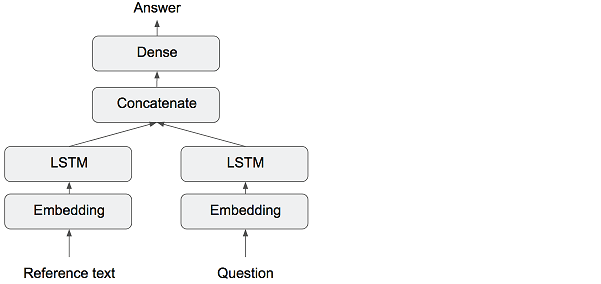